# About Dataset

The data set includes information about:

Customers who left within the last month – the column is called Churn.

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

Demographic info about customers – gender, age range, and if they have partners and dependents


Churn - Whether the customer churned or not (Yes, No)

PhoneService - whether the customer has a phone service or not (Yes,No).

MultipleLines - whether the customer has a multiple line or not (Yes, No, No phone service).

InternetService - type of internet service the customer has (DSL, Fiber Optic, No).

OnlineSecurity - whether the customer has a online security or not (Yes, No).

OnlineBackup - whether the customer has a online backup or not (Yes, No).

DeviceProtection - whether the customer has a device protection or not (Yes, No).

TechSupport - whether the customer has a tech support or not (Yes,No).

StreamingTV - whether the customer has a streaming TV (Yes,No).

StreamingMovies - whether the customer has a streaming movies (Yes,No)

Tenure - how long customer has stayed in company.

Contract - type of contract customer has (Month-to-Month, One Year, Two Year).

PaperlessBilling - whether the customer has a paperless billing (Yes,No).

PaymentMethod - payment method used by customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

MonthlyCharges - amount charged to the customer monthly.

TotalCharges - the total amount charged to the customer.

CustomerID - Unique value for each customer.

gender - type of gender customer has (Male,Female).

SeniorCitizen - whether the customer is a senior citizen (Yes,No).

Partner - whether the customer has a partner or not (Yes, No).

Dependents - whether the customer has a dependents or not (Yes,No)

In [ ]:
# Importing required Libraries

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [ ]:
# Loading the dataset

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Columns present in the dataset

print("Columns in the dataset",df.columns)

Columns in the dataset Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# Checking the first 10 rows of train dataset

df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [ ]:
# Checking the last 10 rows of train dataset:

df.tail(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7033  9767-FFLEM    Male              0      No         No      38   
7034  0639-TSIQW  Female              0      No         No      67   
7035  8456-QDAVC    Male              0      No         No      19   
7036  7750-EYXWZ  Female              0      No         No      12   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
7033          Yes                No     Fiber optic                   No   
7034          Yes               Yes     Fiber optic                  Yes   
7035          Yes                No     Fiber optic                   No   
7036           No  No phone service             DSL                   No   
7037          Yes                No              No  No internet service   
7038          Yes               Yes             DSL                  Yes   
7039          Yes               Yes     Fiber optic                   No   
7040           No  No phone service             DSL                  Yes   
7041          Yes               Yes     Fiber optic                   No   
7042          Yes                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
7033                   No                   No                   No   
7034                  Yes                  Yes                   No   
7035                   No                   No                   No   
7036                  Yes                  Yes                  Yes   
7037  No internet service  No internet service  No internet service   
7038                   No                  Yes                  Yes   
7039                  Yes                  Yes                   No   
7040                   No                   No                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
7033                   No                   No  Month-to-month   
7034                  Yes                   No  Month-to-month   
7035                  Yes                   No  Month-to-month   
7036                  Yes                  Yes        One year   
7037  No internet service  No internet service        Two year   
7038                  Yes                  Yes        One year   
7039                  Yes                  Yes        One year   
7040                   No                   No  Month-to-month   
7041                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
7033              Yes    Credit card (automatic)           69.50      2625.25   
7034              Yes    Credit card (automatic)          102.95      6886.25   
7035              Yes  Bank transfer (automatic)           78.70       1495.1   
7036               No           Electronic check           60.65        743.3   
7037              Yes  Bank transfer (automatic)           21.15       1419.4   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5  

In [ ]:
# Checking the number of rows and columns.

print("Total number of observations/rows in dataset are:", df.shape[0])
print("Total number of features/columns in dataset are:", df.shape[1])

Total number of observations/rows in dataset are: 7043
Total number of features/columns in dataset are: 21


In [ ]:
# Checking the basic info of the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no missing values in the dataset

In [ ]:
# Since customerID is insignificant in predicting the customer churn, dropping the same:

df.drop('customerID', axis=1, inplace=True)

In [ ]:
# Checking the data description of all the variables, which gives us the count, mean, std, minimum, 25th quartile,
# median, 75th quartile and maximum values in the respective numerical columns.

df.describe(include='all').T

count unique               top  freq       mean        std  \
gender              7043      2              Male  3555        NaN        NaN   
SeniorCitizen     7043.0    NaN               NaN   NaN   0.162147   0.368612   
Partner             7043      2                No  3641        NaN        NaN   
Dependents          7043      2                No  4933        NaN        NaN   
tenure            7043.0    NaN               NaN   NaN  32.371149  24.559481   
PhoneService        7043      2               Yes  6361        NaN        NaN   
MultipleLines       7043      3                No  3390        NaN        NaN   
InternetService     7043      3       Fiber optic  3096        NaN        NaN   
OnlineSecurity      7043      3                No  3498        NaN        NaN   
OnlineBackup        7043      3                No  3088        NaN        NaN   
DeviceProtection    7043      3                No  3095        NaN        NaN   
TechSupport         7043      3                No  3473        NaN        NaN   
StreamingTV         7043      3                No  2810        NaN        NaN   
StreamingMovies     7043      3                No  2785        NaN        NaN   
Contract            7043      3    Month-to-month  3875        NaN        NaN   
PaperlessBilling    7043      2               Yes  4171        NaN        NaN   
PaymentMethod       7043      4  Electronic check  2365        NaN        NaN   
MonthlyCharges    7043.0    NaN               NaN   NaN  64.761692  30.090047   
TotalCharges        7043   6531                      11        NaN        NaN   
Churn               7043      2                No  5174        NaN        NaN   

                    min   25%    50%    75%     max  
gender              NaN   NaN    NaN    NaN     NaN  
SeniorCitizen       0.0   0.0    0.0    0.0     1.0  
Partner             NaN   NaN    NaN    NaN     NaN  
Dependents          NaN   NaN    NaN    NaN     NaN  
tenure              0.0   9.0   29.0   55.0    72.0  
PhoneService        NaN   NaN    NaN    NaN     NaN  
MultipleLines       NaN   NaN    NaN    NaN     NaN  
InternetService     NaN   NaN    NaN    NaN     NaN  
OnlineSecurity      NaN   NaN    NaN    NaN     NaN  
OnlineBackup        NaN   NaN    NaN    NaN     NaN  
DeviceProtection    NaN   NaN    NaN    NaN     NaN  
TechSupport         NaN   NaN    NaN    NaN     NaN  
StreamingTV         NaN   NaN    NaN    NaN     NaN  
StreamingMovies     NaN   NaN    NaN    NaN     NaN  
Contract            NaN   NaN    NaN    NaN     NaN  
PaperlessBilling    NaN   NaN    NaN    NaN     NaN  
PaymentMethod       NaN   NaN    NaN    NaN     NaN  
MonthlyCharges    18.25  35.5  70.35  89.85  118.75  
TotalCharges        NaN   NaN    NaN    NaN     NaN  
Churn               NaN   NaN    NaN    NaN     NaN

In [ ]:
# Before Starting the Exploratory Data Analysis, Seeing how the data values look like for all the observations:

for i in df.columns:
    print("*"*50, i, "*"*50)
    print(set(df[i].to_list()))

************************************************** gender **************************************************
{'Female', 'Male'}
************************************************** SeniorCitizen **************************************************
{0, 1}
************************************************** Partner **************************************************
{'No', 'Yes'}
************************************************** Dependents **************************************************
{'No', 'Yes'}
************************************************** tenure **************************************************
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
************************************************** PhoneService ******************************************

In [ ]:
df[df['TotalCharges'] == ' ']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [ ]:
# It can be seen that there are empty space for a few observations for which the tenure is 0, hence it is logical to impute the monthly charges to the
# total charges where the value is blank.

# First converting the datatype from object to numeric:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [ ]:
# Now imputing the values of monthly charges to the observations where NaN is present and tenure is 0:

df['TotalCharges'] = np.where(df['TotalCharges'].isnull() == True, df['MonthlyCharges'],df['TotalCharges'])

# Exploratory Data Analysis

## Univariate Analysis of the features

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
num_fts = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
cat_fts = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'],axis=1)

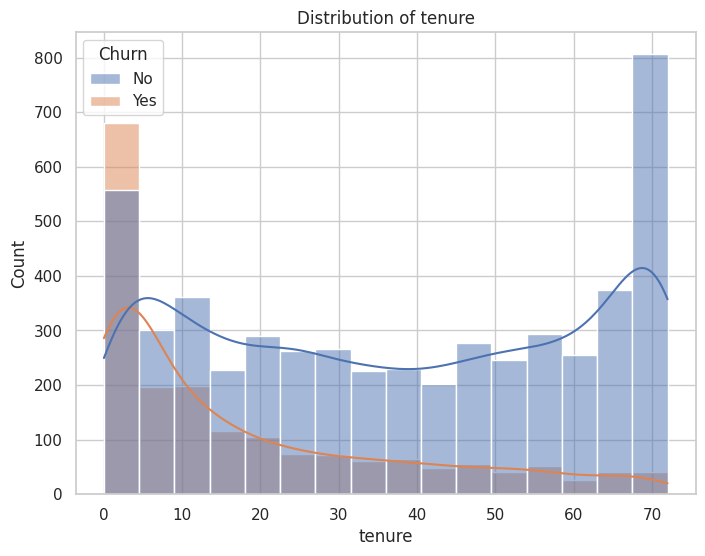

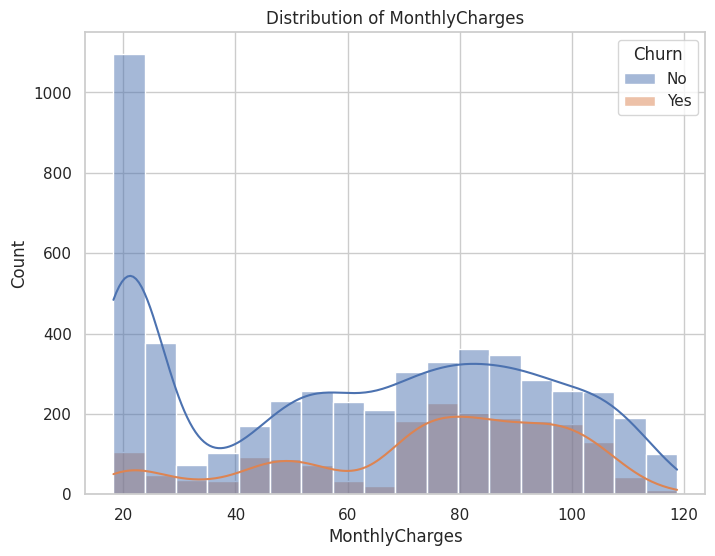

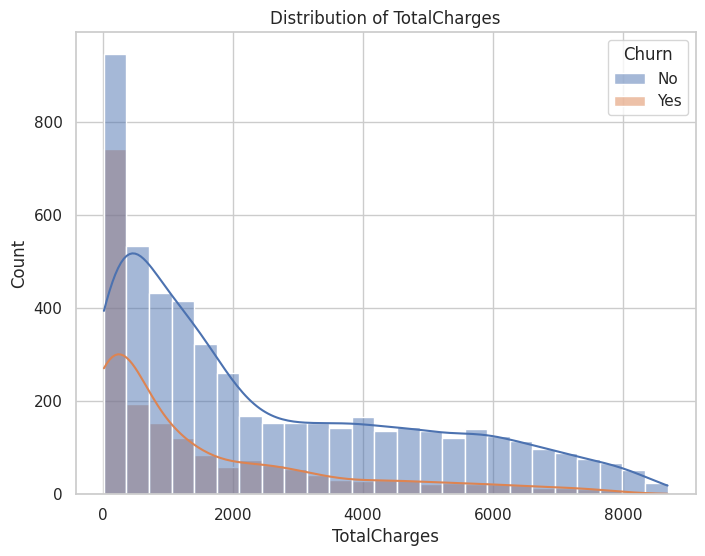

In [ ]:
# Checking how the numerical features are distributed

for i in num_fts.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=num_fts,x=i ,hue='Churn',kde = True)
    plt.title(f'Distribution of {i}')
    plt.show()

It is observed that the customers who are with the company for a long time are more likely to stay because of the increased trust

Customers with increased monthly charges have seen to be exiting the services of the company.

It can be seen that the customers utilising the maximum services with high total charges are more likely to stay and on the contrary those with less services and low total charges are more likely to quit.

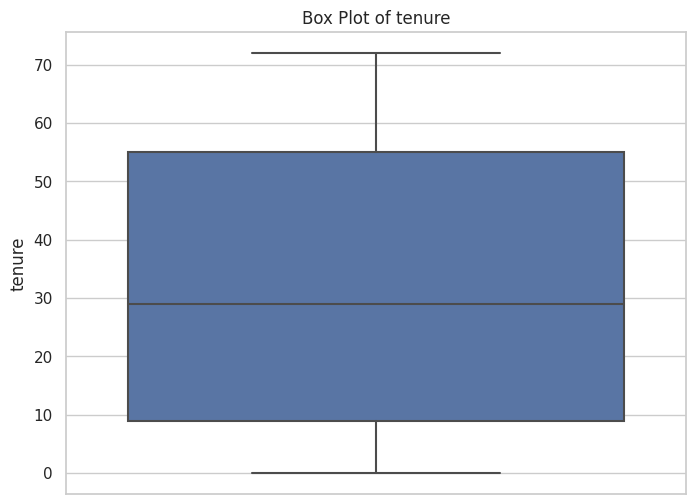

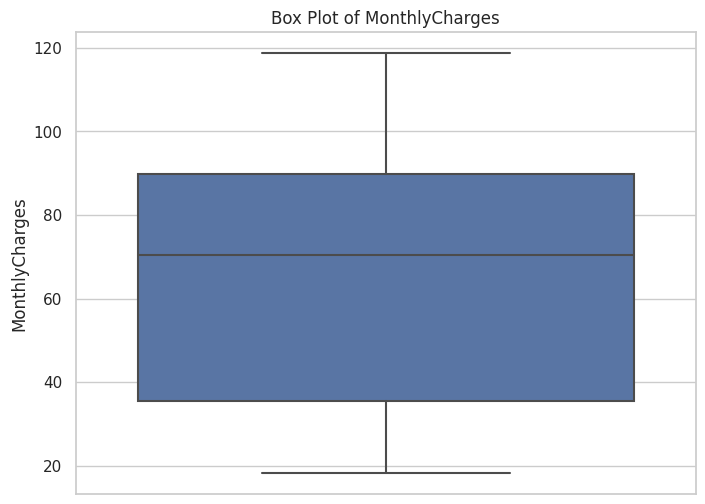

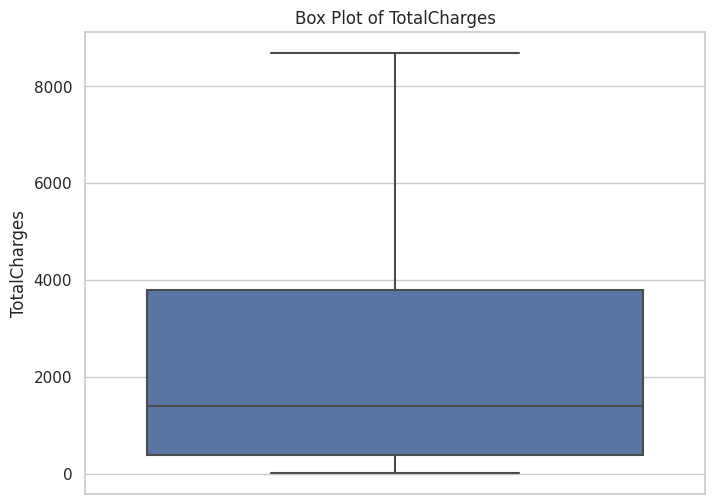

In [ ]:
for i in num_fts.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=num_fts,y=i)
    plt.title(f'Box Plot of {i}')
    plt.show()

There is clearly no presence of outliers in almost all of the numerical features.

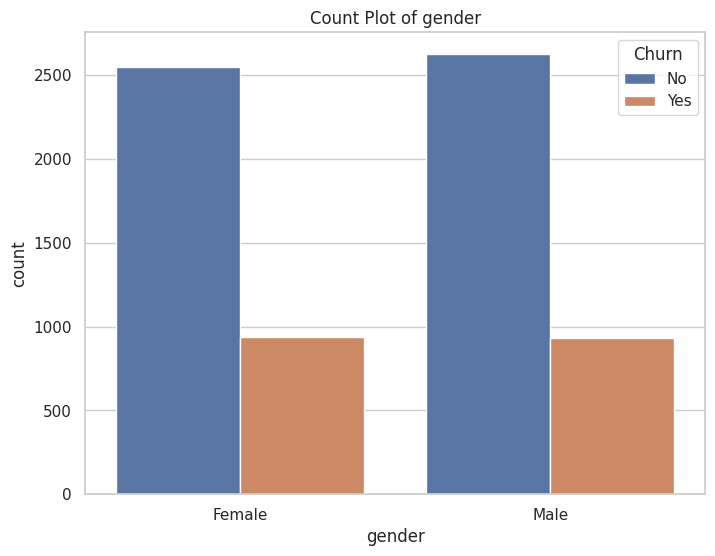

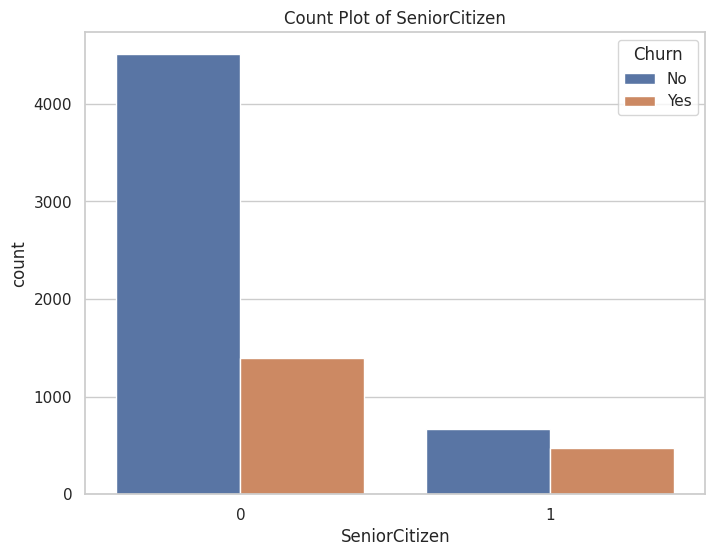

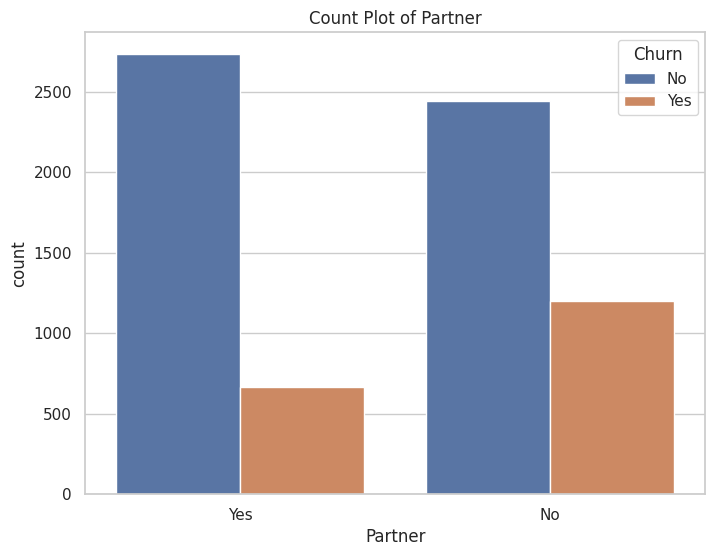

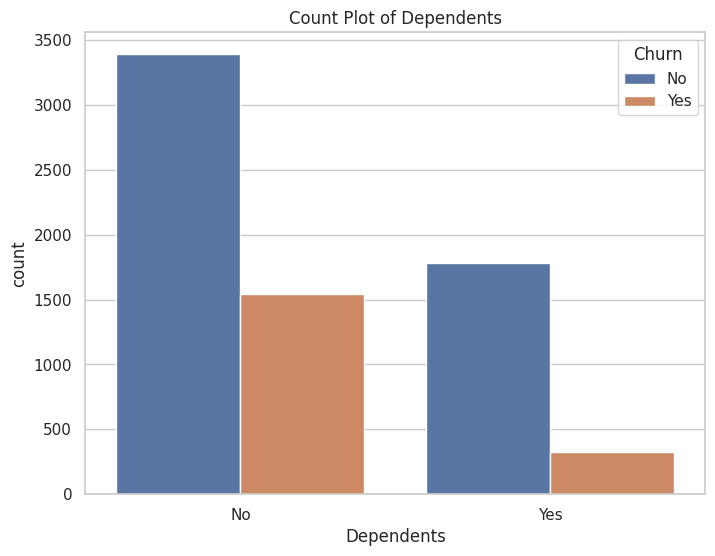

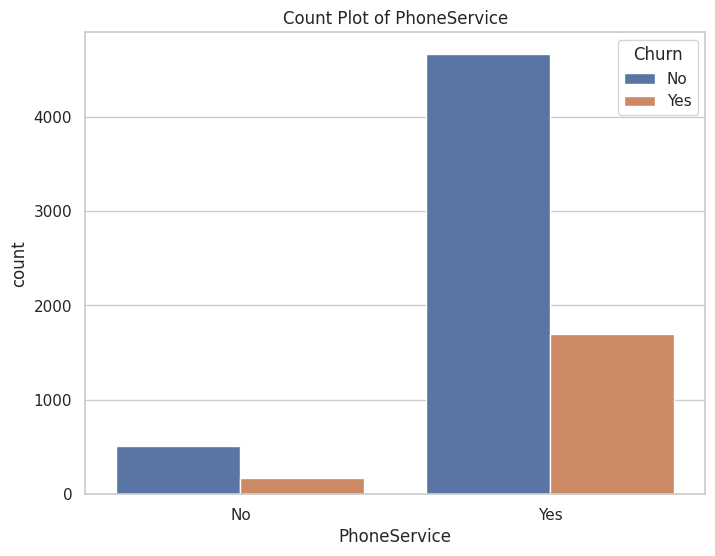

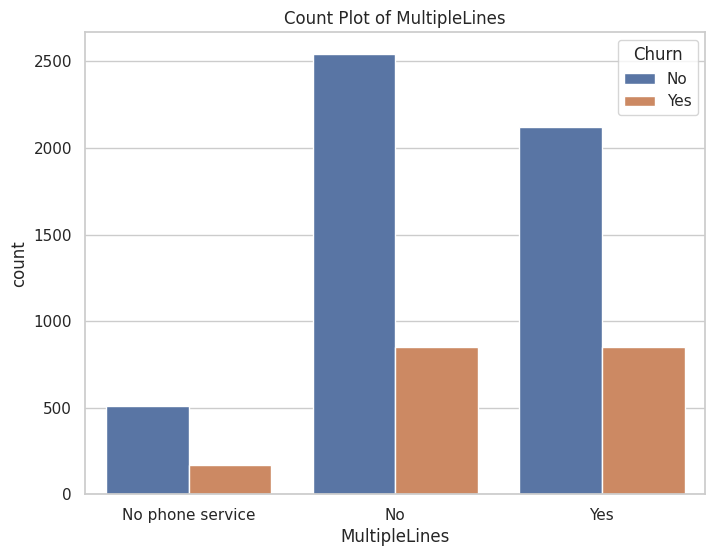

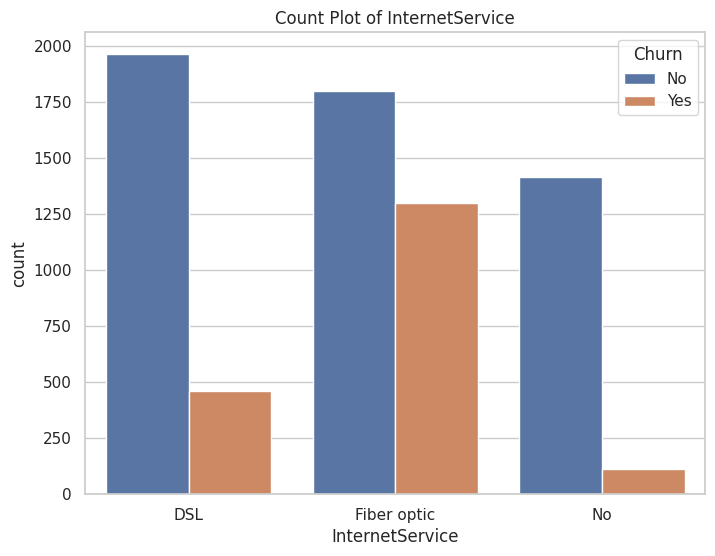

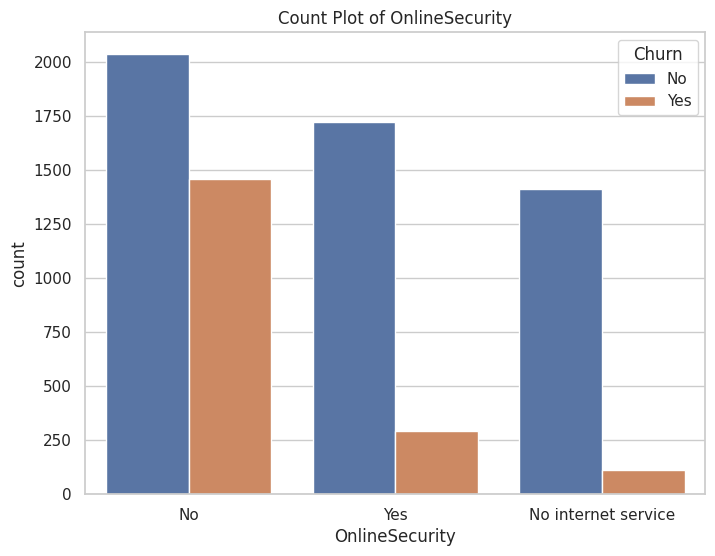

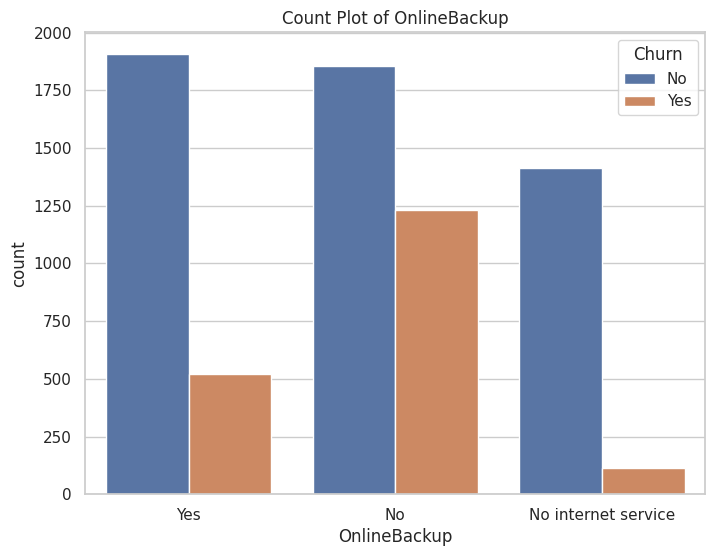

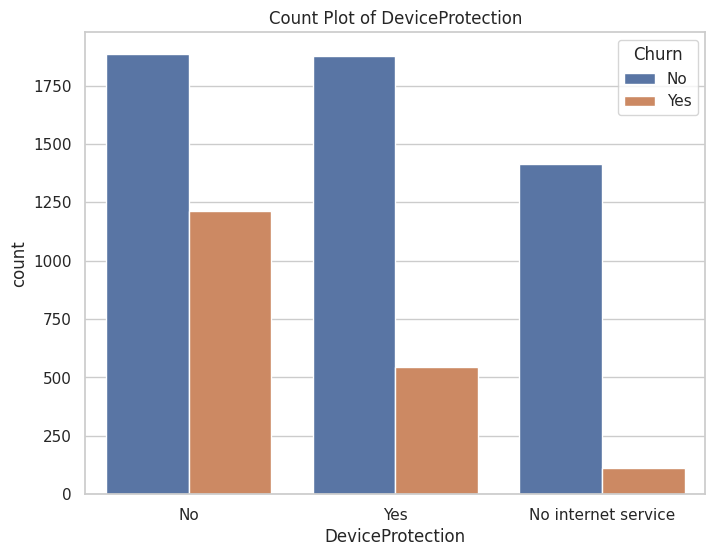

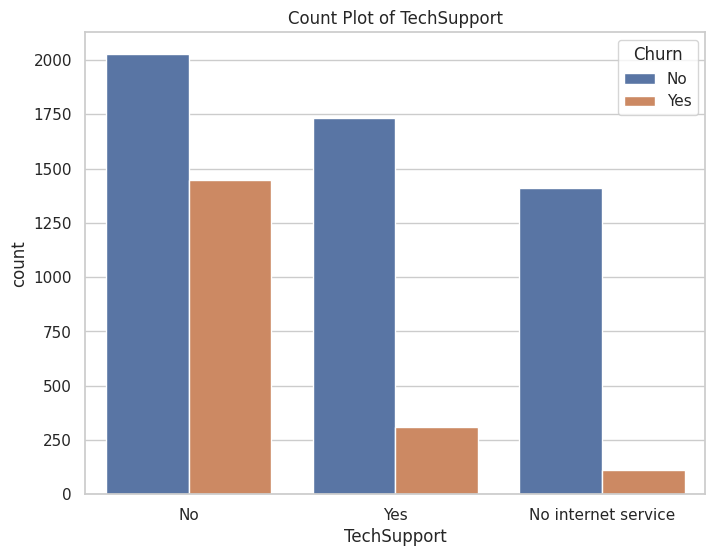

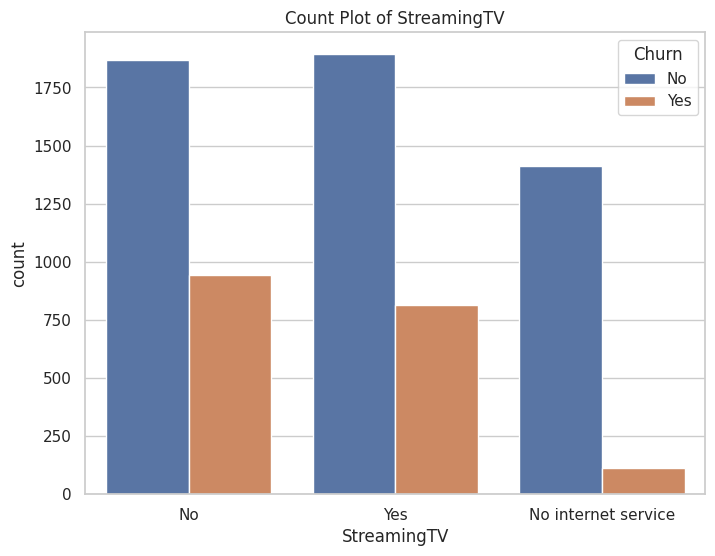

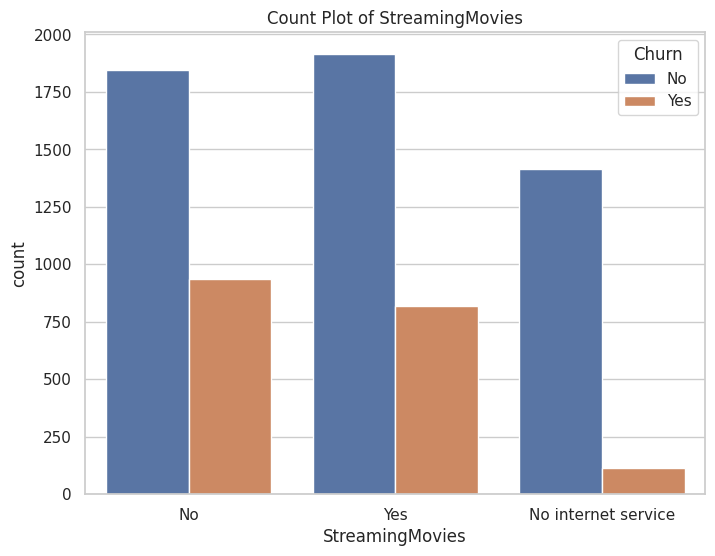

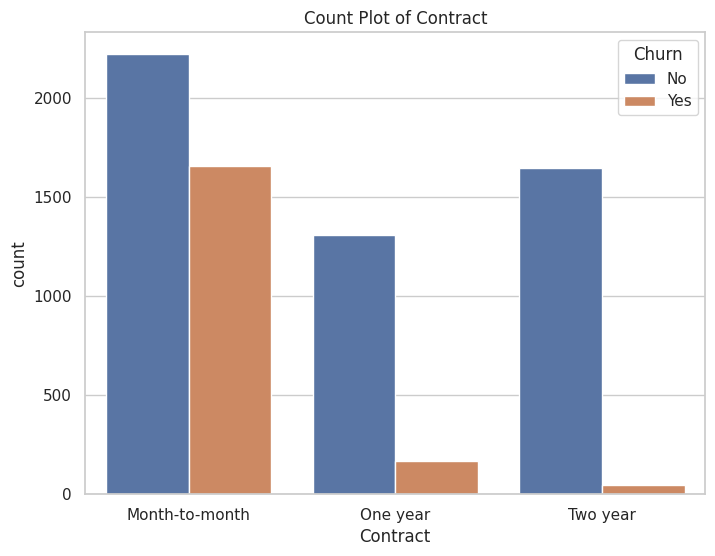

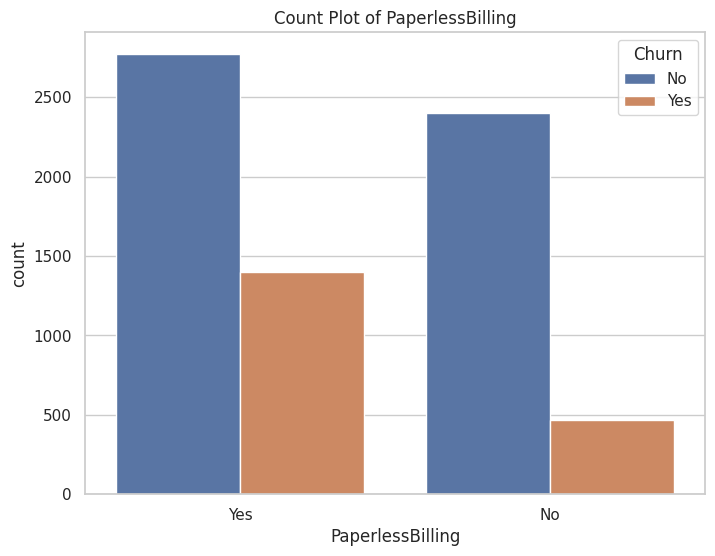

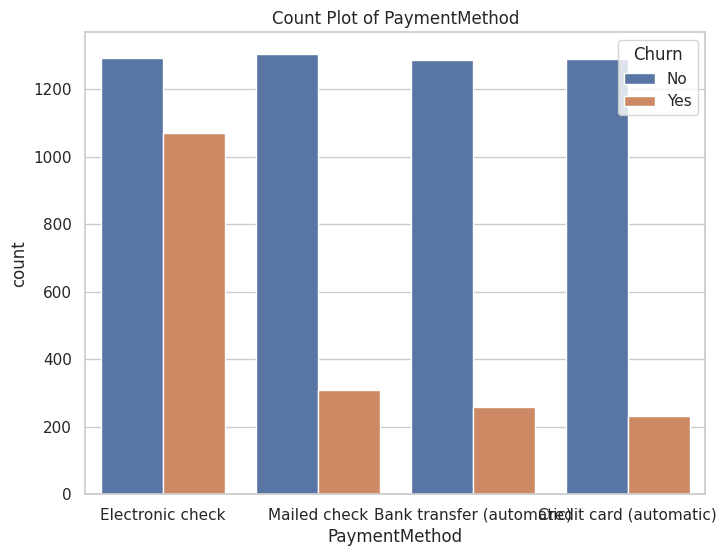

In [ ]:
for i in cat_fts.columns[:-1]:
    plt.figure(figsize=(8,6))
    sns.countplot(data=cat_fts, x=i, hue='Churn')
    plt.title(f'Count Plot of {i}')
    plt.show()

It can be observed that the churn rate is more for customers who have not opted for the services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.

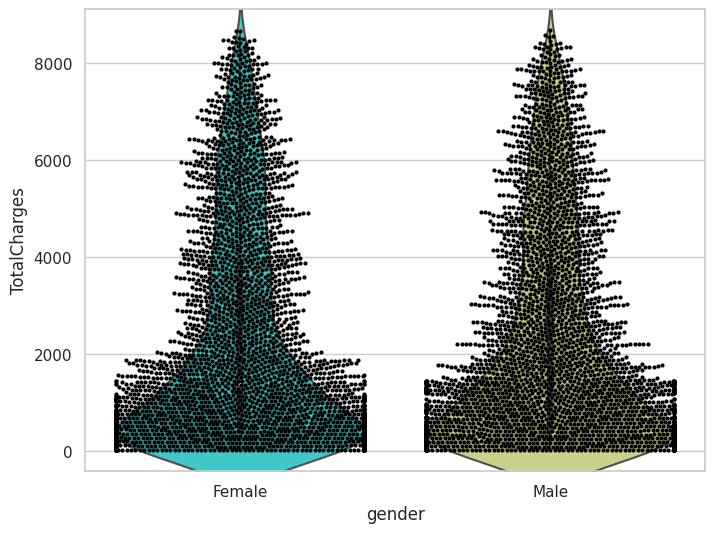

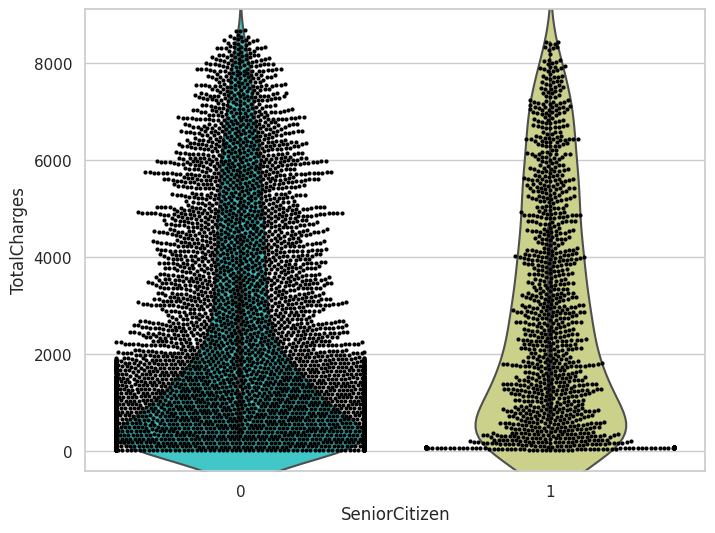

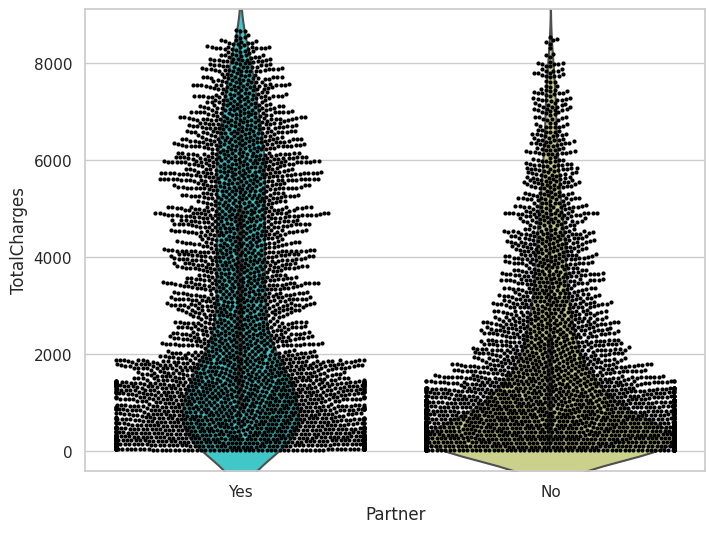

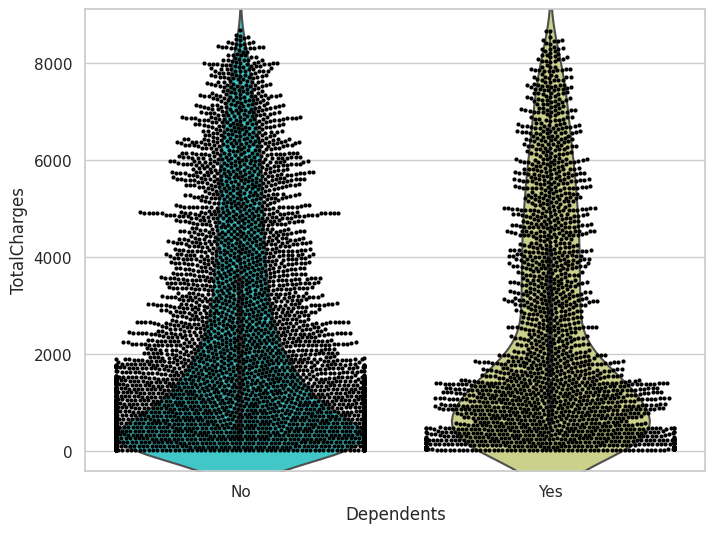

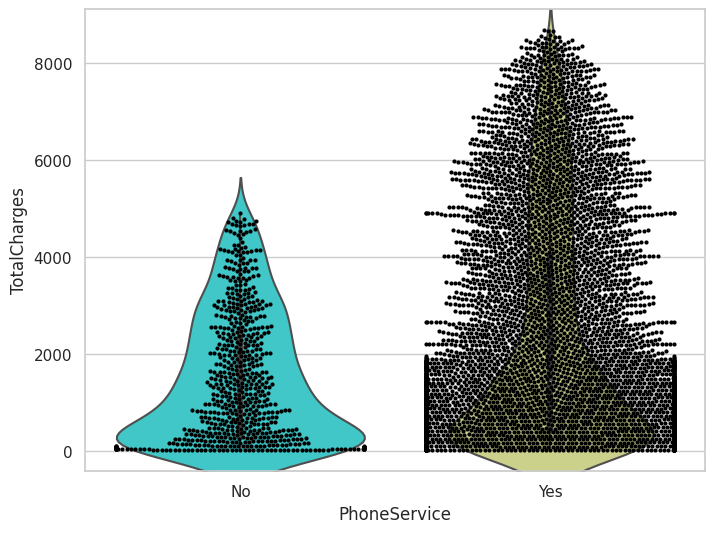

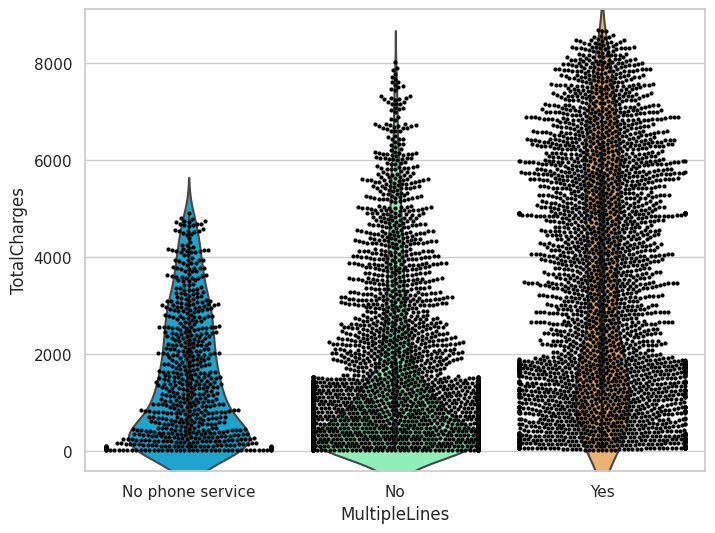

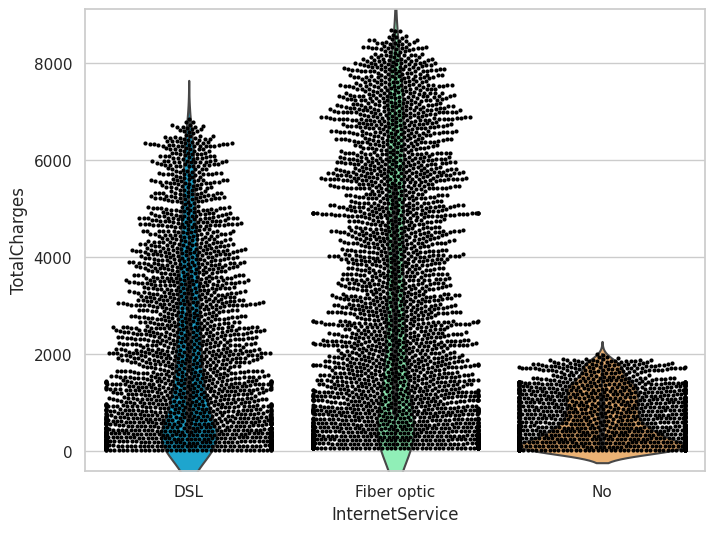

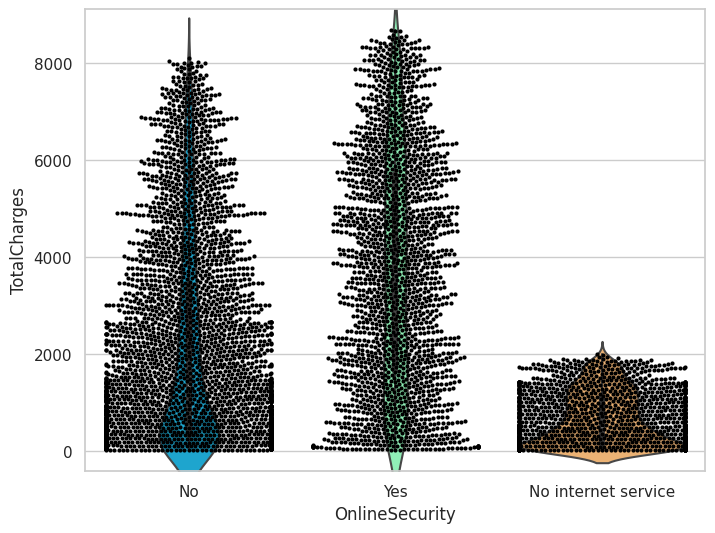

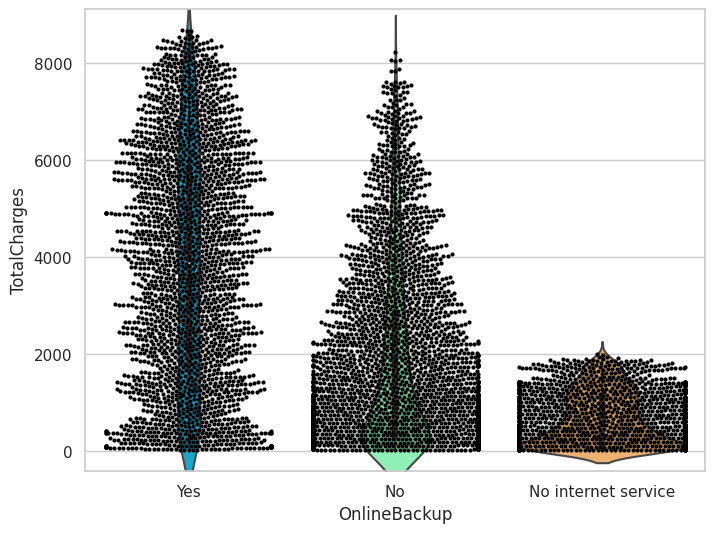

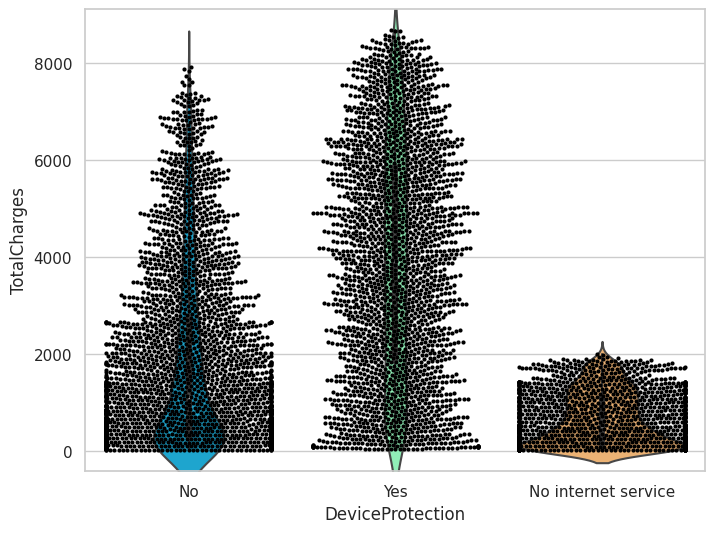

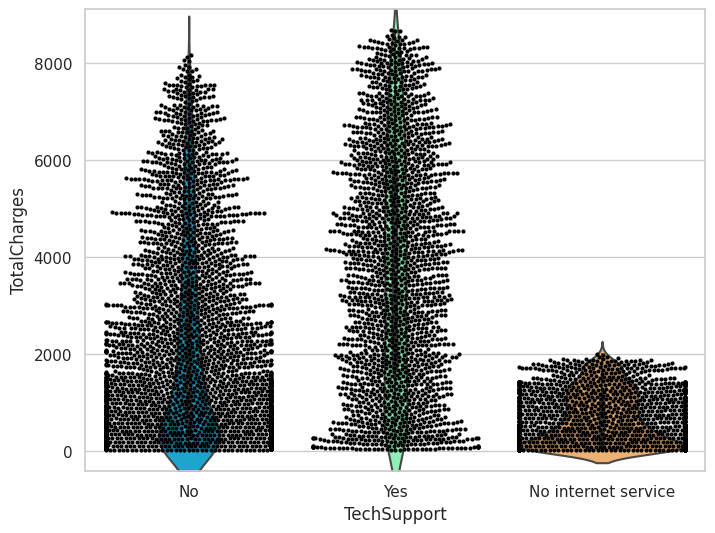

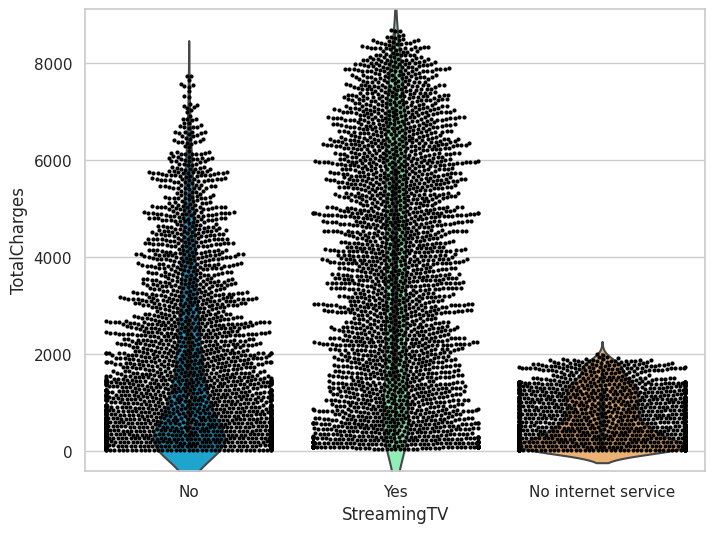

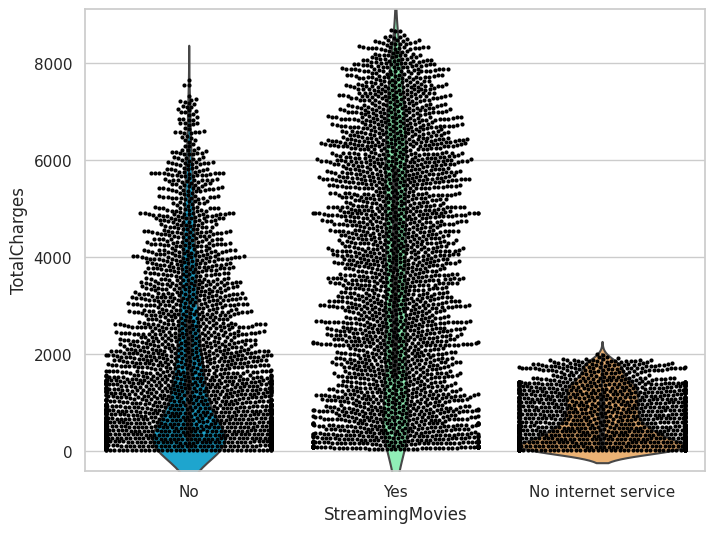

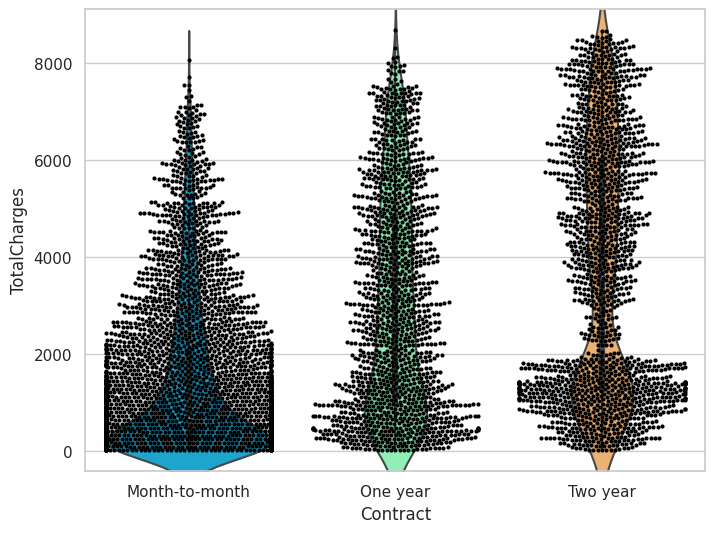

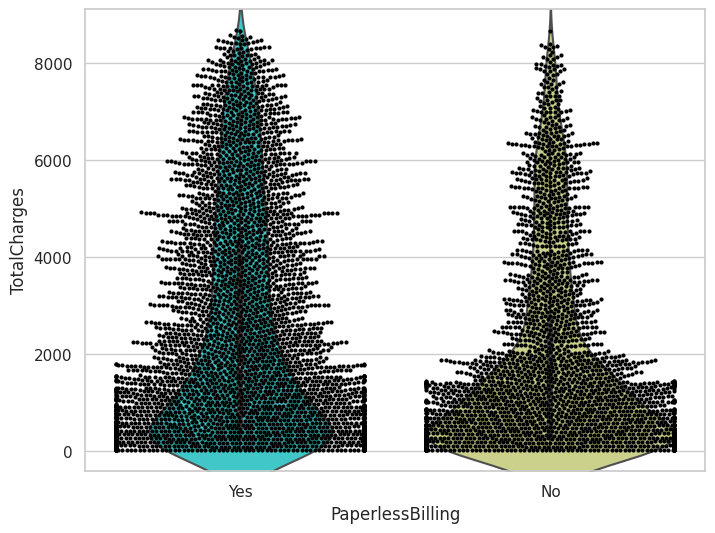

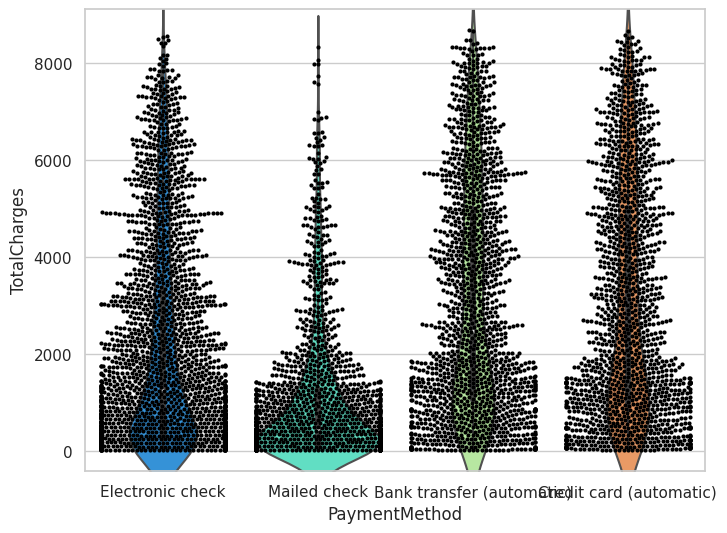

In [ ]:
for i in cat_fts.columns.drop(['Churn']):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=i, y=df['TotalCharges'], data=cat_fts, palette='rainbow')
    sns.swarmplot(x=i, y=df['TotalCharges'], data=cat_fts, color='black',size=3)
    plt.show()

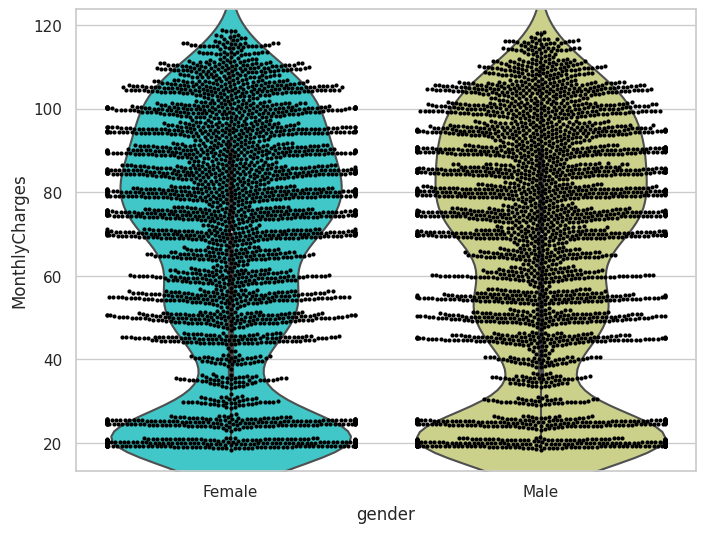

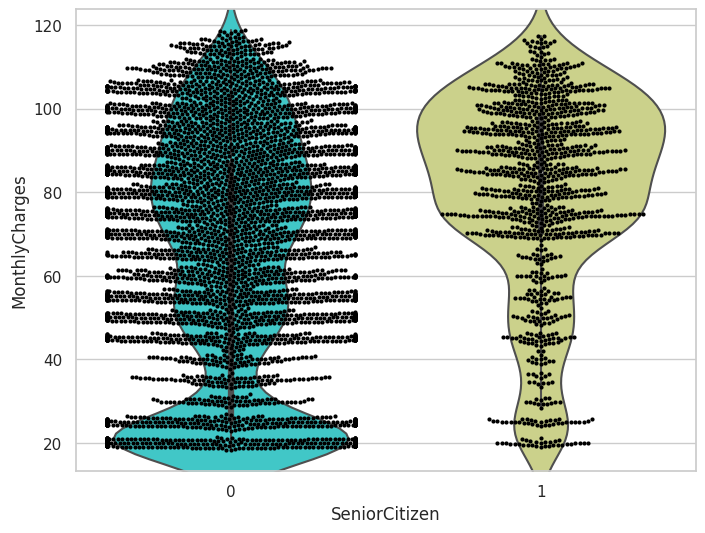

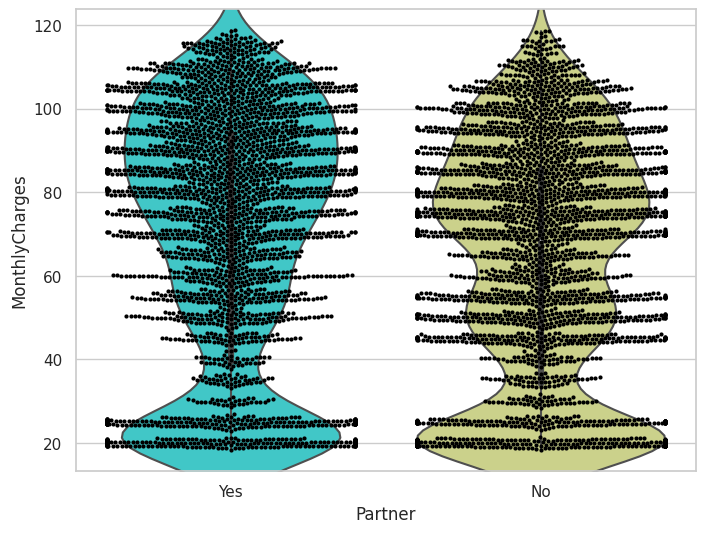

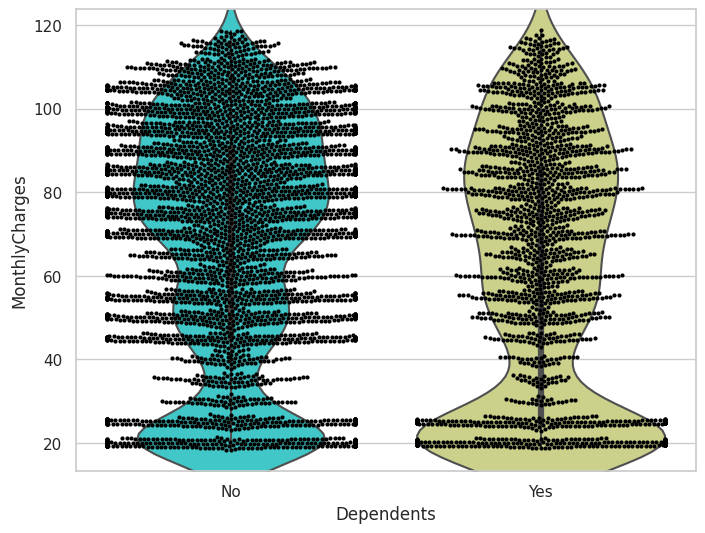

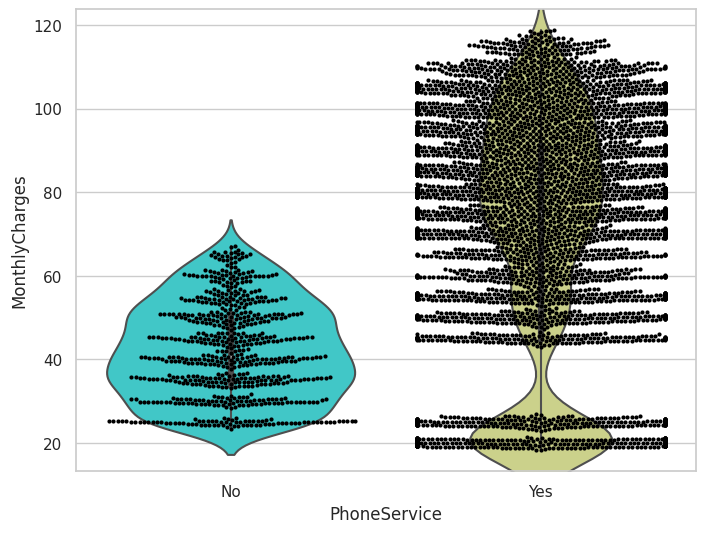

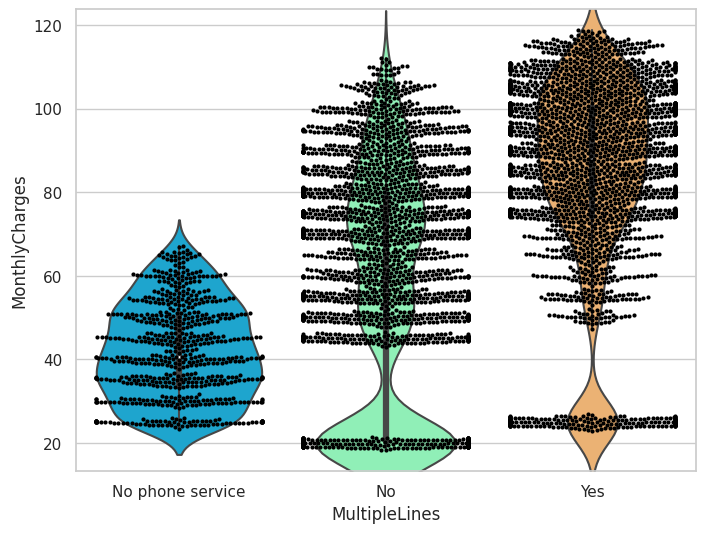

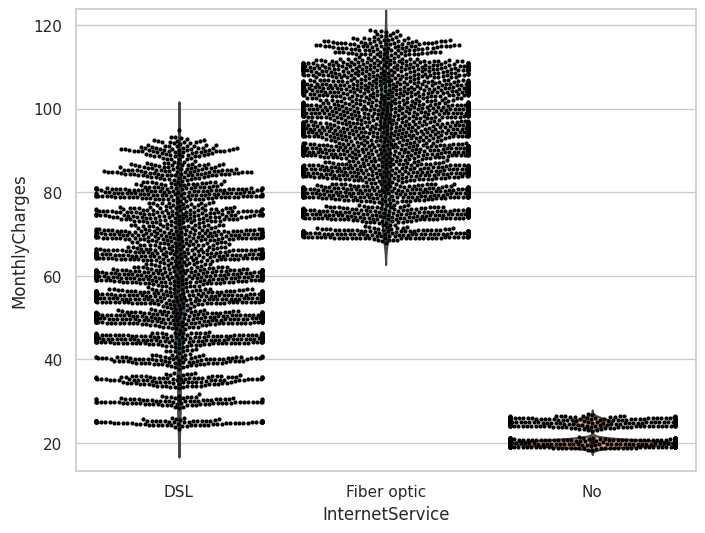

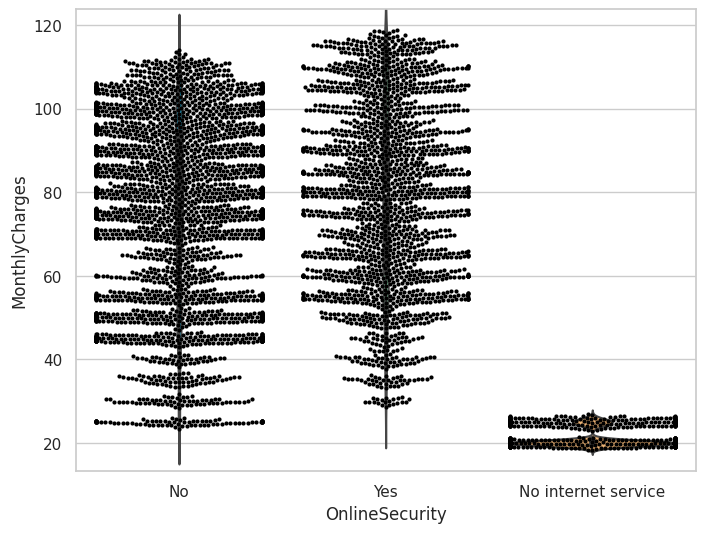

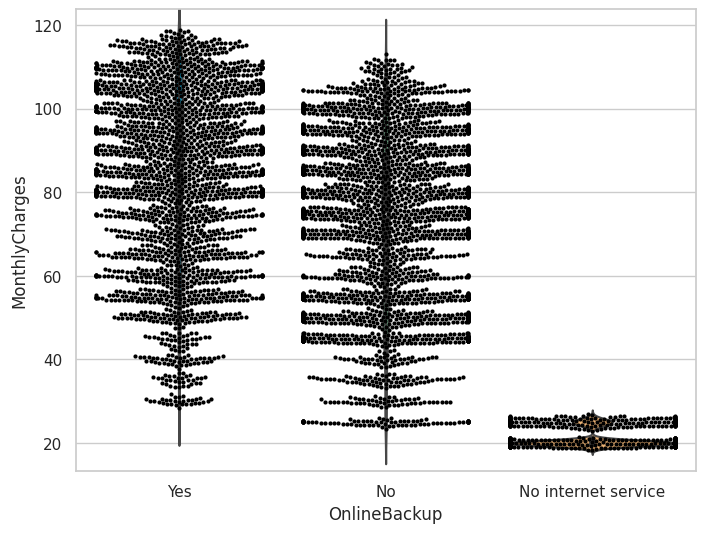

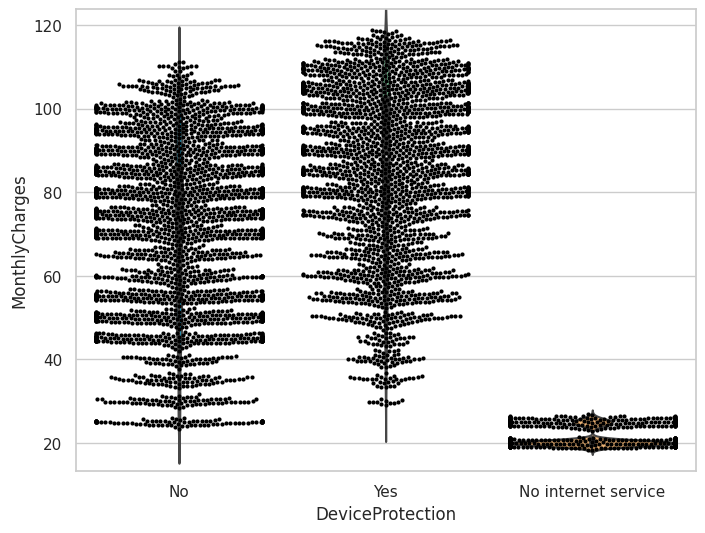

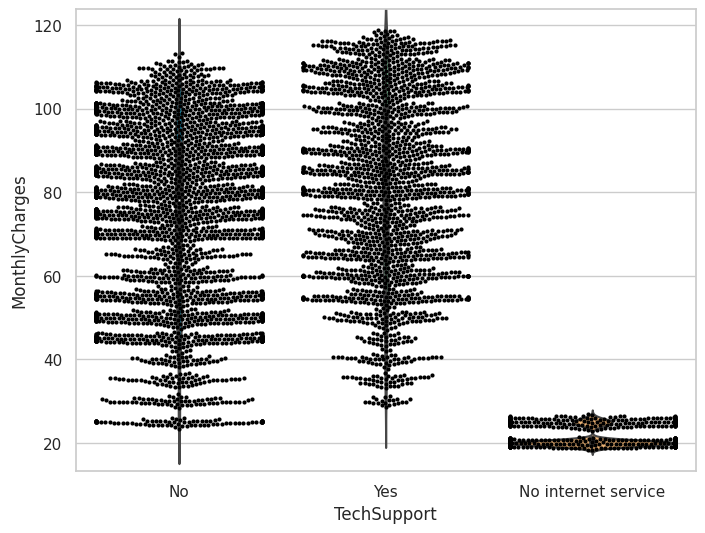

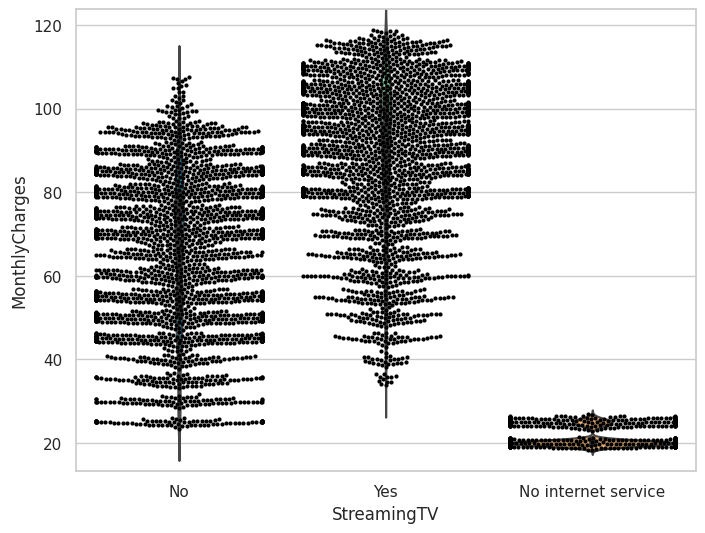

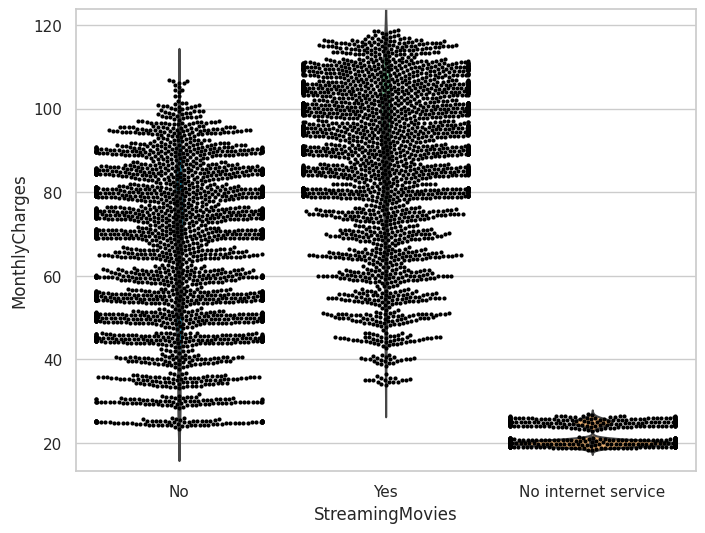

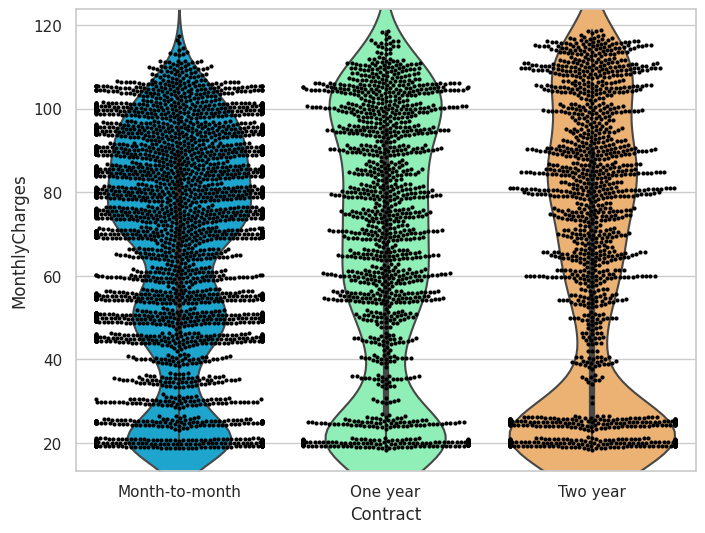

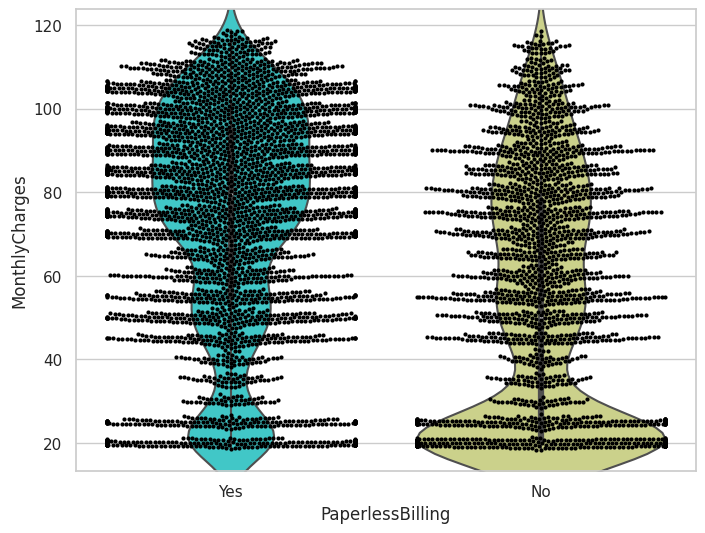

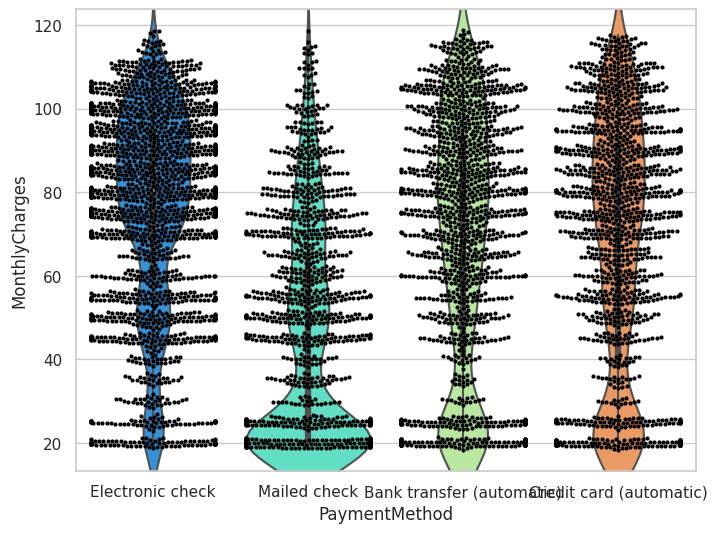

In [ ]:
for i in cat_fts.columns.drop(['Churn']):
    plt.figure(figsize=(8,6))
    sns.violinplot(x=i, y=df['MonthlyCharges'], data=cat_fts, palette='rainbow')
    sns.swarmplot(x=i, y=df['MonthlyCharges'], data=cat_fts, color='black',size=3)
    plt.show()

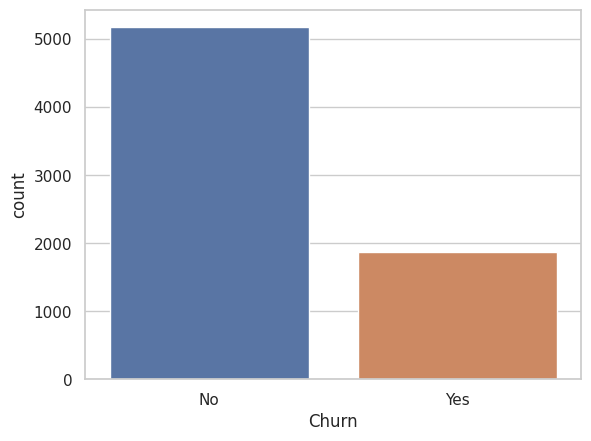

In [ ]:
sns.countplot(data=df, x = 'Churn')
plt.show()

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

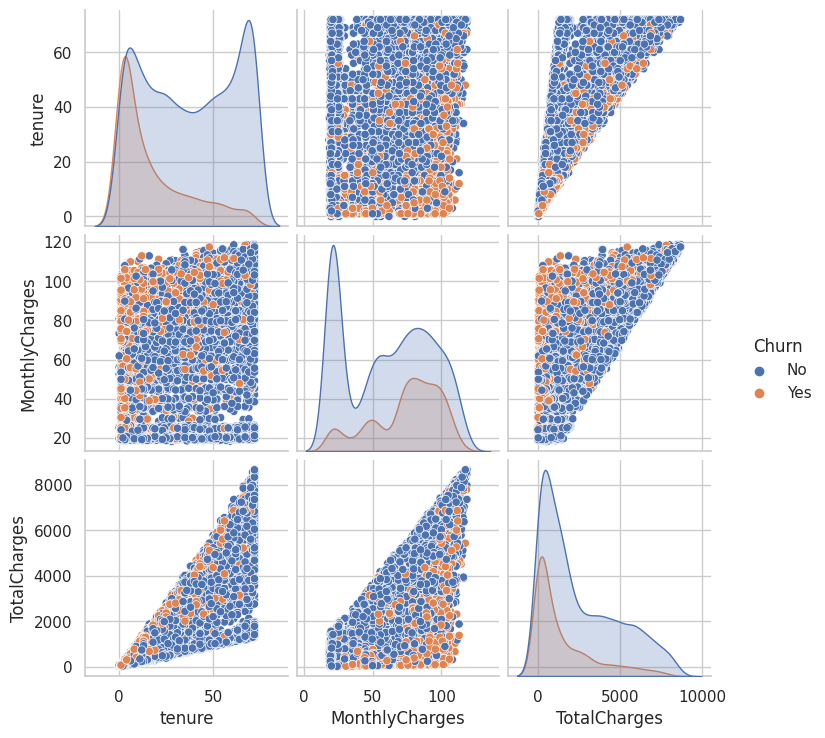

In [ ]:
sns.pairplot(num_fts, hue='Churn')
plt.show()

## Multivariate Analysis

In [ ]:
df.corr()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102997
tenure               0.016567  1.000000        0.247900      0.826164
MonthlyCharges       0.220173  0.247900        1.000000      0.651182
TotalCharges         0.102997  0.826164        0.651182      1.000000

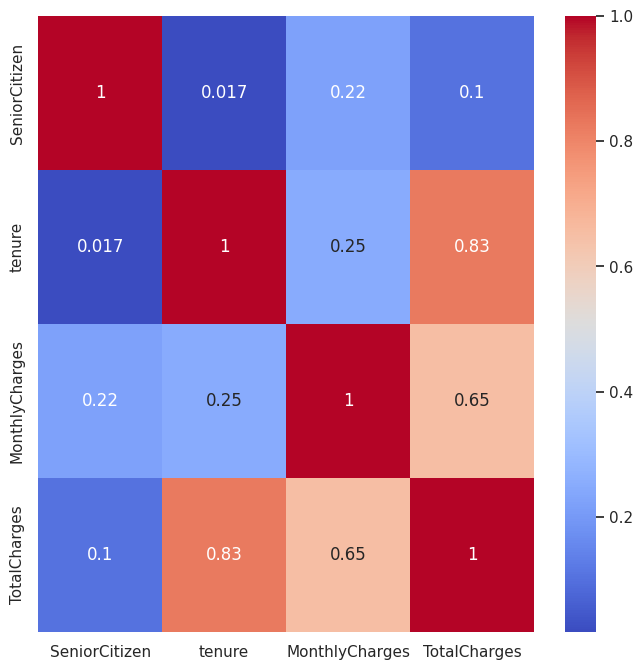

In [ ]:
# The same can be visualised in the form of a heatmap.

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

In [ ]:
# Taking a copy of the data for preprocessing and model building

df1 = df.copy()

## Handling missing values

Missing values are already handled.

In [ ]:
pd.DataFrame(df1.isnull().sum()/len(df1)*100, columns = ['Null value %'], index = df1.columns)

Null value %
gender                     0.0
SeniorCitizen              0.0
Partner                    0.0
Dependents                 0.0
tenure                     0.0
PhoneService               0.0
MultipleLines              0.0
InternetService            0.0
OnlineSecurity             0.0
OnlineBackup               0.0
DeviceProtection           0.0
TechSupport                0.0
StreamingTV                0.0
StreamingMovies            0.0
Contract                   0.0
PaperlessBilling           0.0
PaymentMethod              0.0
MonthlyCharges             0.0
TotalCharges               0.0
Churn                      0.0

# Checking the datatypes for label encoding and One hot encoding

In [ ]:
pd.DataFrame(df1.dtypes, columns = ['Datatype'], index = df1.columns)

Datatype
gender             object
SeniorCitizen       int64
Partner            object
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
OnlineSecurity     object
OnlineBackup       object
DeviceProtection   object
TechSupport        object
StreamingTV        object
StreamingMovies    object
Contract           object
PaperlessBilling   object
PaymentMethod      object
MonthlyCharges    float64
TotalCharges      float64
Churn              object

## Label Encoding

In [ ]:
# Female: 0, Male: 1

df1['gender'] = df1['gender'].astype('category')
df1['gender'] = df1['gender'].cat.codes

In [ ]:
# No: 0, Yes: 1

df1['Partner'] = df1['Partner'].astype('category')
df1['Partner'] = df1['Partner'].cat.codes

In [ ]:
# No: 0, Yes: 1

df1['Dependents'] = df1['Dependents'].astype('category')
df1['Dependents'] = df1['Dependents'].cat.codes

In [ ]:
# No: 0, Yes: 1

df1['PhoneService'] = df1['PhoneService'].astype('category')
df1['PhoneService'] = df1['PhoneService'].cat.codes

In [ ]:
# No: 0, Yes: 1

df1['PaperlessBilling'] = df1['PaperlessBilling'].astype('category')
df1['PaperlessBilling'] = df1['PaperlessBilling'].cat.codes

In [ ]:
# No: 0, Yes: 1

df1['Churn'] = df1['Churn'].astype('category')
df1['Churn'] = df1['Churn'].cat.codes

In [ ]:
# One hot encoding

df1 = pd.get_dummies(data=df1, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)

In [ ]:
pd.DataFrame(df1.dtypes, columns=['Datatypes'], index = df1.columns)

Datatypes
gender                                     int8
SeniorCitizen                             int64
Partner                                    int8
Dependents                                 int8
tenure                                    int64
PhoneService                               int8
PaperlessBilling                           int8
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                      int8
MultipleLines_No phone service            uint8
MultipleLines_Yes                         uint8
InternetService_Fiber optic               uint8
InternetService_No                        uint8
OnlineSecurity_No internet service        uint8
OnlineSecurity_Yes                        uint8
OnlineBackup_No internet service          uint8
OnlineBackup_Yes                          uint8
DeviceProtection_No internet service      uint8
DeviceProtection_Yes                      uint8
TechSupport_No internet service           uint8
TechSupport_Yes                           uint8
StreamingTV_No internet service           uint8
StreamingTV_Yes                           uint8
StreamingMovies_No internet service       uint8
StreamingMovies_Yes                       uint8
Contract_One year                         uint8
Contract_Two year                         uint8
PaymentMethod_Credit card (automatic)     uint8
PaymentMethod_Electronic check            uint8
PaymentMethod_Mailed check                uint8

## Handling Outliers

There are no outliers in the dataset

# Feature Scaling

In [ ]:
# Splitting the column into dependent and independent variables

x = df1.drop('Churn', axis=1)
y = df1['Churn']

In [ ]:
x.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  \
0                 1           29.85         29.85   
1                 0           56.95       1889.50   
2                 1           53.85        108.15   
3                 0           42.30       1840.75   
4                 1           70.70        151.65   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                               1                  0   
4                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   1   
3                                   0                   1   
4                                   0                   0   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                 0                 1   
1                                 0                 0   
2                                 0                 1   
3                                 0                 0   
4                                 0                 0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   TechSupport_No internet service  TechSupport_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0  

In [ ]:
# Scaling only the columns tenure, MonthlyCharges and TotalCharges using MinMax scaler

from sklearn.preprocessing import MinMaxScaler
sc_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
x[sc_features] = scaler.fit_transform(x[sc_features])

In [ ]:
x.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  \
0                 1        0.115423      0.001275   
1                 0        0.385075      0.215867   
2                 1        0.354229      0.010310   
3                 0        0.239303      0.210241   
4                 1        0.521891      0.015330   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                               1                  0   
4                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   1   
3                                   0                   1   
4                                   0                   0   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                 0                 1   
1                                 0                 0   
2                                 0                 1   
3                                 0                 0   
4                                 0                 0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   TechSupport_No internet service  TechSupport_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                             

# Imbalance Treatment of the Output variable

Approach 1: Since we are building a DNN model, trying first with imbalance data

# Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [ ]:
# importing necessary packages to build a DNN model

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
# Building API
model = Sequential()

# Adding First hidden layers
model.add(Dense(units=256, activation = 'relu', input_shape = (30,)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Adding 2nd hidden layer
model.add(Dense(units=128, activation = 'relu')) # Consecutive neural network number can be reduced from the previous layer but not to be increased
model.add(Dropout(0.4))
model.add(BatchNormalization())

# Adding 3rd hidden layer
model.add(Dense(units=64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Adding Output layer
model.add(Dense(units=1, activation='sigmoid'))

# training the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the model:

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
166/166 [==============================] - 6s 12ms/step - loss: 0.6208 - accuracy: 0.6721 - val_loss: 0.4793 - val_accuracy: 0.7394
Epoch 2/100
166/166 [==============================] - 1s 7ms/step - loss: 0.5024 - accuracy: 0.7527 - val_loss: 0.4383 - val_accuracy: 0.7939
Epoch 3/100
166/166 [==============================] - 1s 7ms/step - loss: 0.4738 - accuracy: 0.7711 - val_loss: 0.4274 - val_accuracy: 0.7984
Epoch 4/100
166/166 [==============================] - 1s 7ms/step - loss: 0.4609 - accuracy: 0.7730 - val_loss: 0.4225 - val_accuracy: 0.7973
Epoch 5/100
166/166 [==============================] - 1s 7ms/step - loss: 0.4534 - accuracy: 0.7755 - val_loss: 0.4207 - val_accuracy: 0.7990
Epoch 6/100
166/166 [==============================] - 1s 7ms/step - loss: 0.4449 - accuracy: 0.7880 - val_loss: 0.4221 - val_accuracy: 0.8012
Epoch 7/100
166/166 [==============================] - 1s 7ms/step - loss: 0.4456 - accuracy: 0.7834 - val_loss: 0.4225 - val_accuracy: 0.798

Approach 2: Building a DNN model, with balanced data

In [ ]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler()
x_balanced, y_balanced = over_sampler.fit_resample(x,y)

In [ ]:
y_balanced.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size = 0.3, random_state = 101)

In [ ]:
# Building API
model1 = Sequential()

# Adding First hidden layers
model1.add(Dense(units=256, activation = 'relu', input_shape = (30,)))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())

# Adding 2nd hidden layer
model1.add(Dense(units=128, activation = 'relu')) # Consecutive neural network number can be reduced from the previous layer but not to be increased
model1.add(Dropout(0.4))
model1.add(BatchNormalization())

# Adding 3rd hidden layer
model1.add(Dense(units=64, activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())

# Adding Output layer
model1.add(Dense(units=1, activation='sigmoid'))

# training the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the model:

history1 = model1.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
227/227 [==============================] - 5s 10ms/step - loss: 0.6483 - accuracy: 0.6729 - val_loss: 0.5352 - val_accuracy: 0.7262
Epoch 2/100
227/227 [==============================] - 2s 8ms/step - loss: 0.5618 - accuracy: 0.7290 - val_loss: 0.4969 - val_accuracy: 0.7533
Epoch 3/100
227/227 [==============================] - 2s 7ms/step - loss: 0.5424 - accuracy: 0.7386 - val_loss: 0.4887 - val_accuracy: 0.7597
Epoch 4/100
227/227 [==============================] - 2s 7ms/step - loss: 0.5265 - accuracy: 0.7442 - val_loss: 0.4854 - val_accuracy: 0.7614
Epoch 5/100
227/227 [==============================] - 2s 7ms/step - loss: 0.5154 - accuracy: 0.7497 - val_loss: 0.4816 - val_accuracy: 0.7623
Epoch 6/100
227/227 [==============================] - 2s 7ms/step - loss: 0.5123 - accuracy: 0.7534 - val_loss: 0.4819 - val_accuracy: 0.7626
Epoch 7/100
227/227 [==============================] - 2s 7ms/step - loss: 0.5026 - accuracy: 0.7565 - val_loss: 0.4809 - val_accuracy: 0.763

# Conclusion: It is observed that the DNN model is performing better with the balanced data with train accuracy of 81.55% and test accuracy of 80.77% compared to the imbalanced data with train accuracy of 82.90% and test accuracy of 78.65%. Hence the DNN model with balanced data is showing promising results and can be used in production.